In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./kddcup99-dataset/kddcup99.csv")

# mostra tamanho da base de dados
df.shape

(494020, 42)

Sobre o Dataset

Esse dataset contém informação de acessos de rede com 494020 entradas com cada uma possuindo 42 atributos. Que são eles:
* duration: duração da conecção
* protocol_typ: tipo de protocoloc de conecção
* servic: serviço usado
* fla: status da conecção
* src_bytes: bytes de origem
* dst_bytes: bytes de destino
* land: 
* wrong_fragment: 
* urgent: 
* hot: 
* num_failed_logins: 
* logged_in: 
* lnum_compromised: 
* lroot_shell: 
* lsu_attempted: 
* lnum_root: 
* lnum_file_creations: 
* lnum_shells: 
* lnum_access_files: 
* lnum_outbound_cmds: 
* is_host_login: 
* is_guest_login: 
* count: 
* srv_count: 
* serror_ra: 
* srv_serror_ra: 
* rerror_ra: 
* srv_rerror_ra: 
* same_srv_ra: 
* diff_srv_ra: 
* srv_diff_host_ra: 
* dst_host_count: 
* dst_host_srv_count: 
* dst_host_same_srv_ra: 
* dst_host_diff_srv_ra: 
* dst_host_same_src_port_ra: 
* dst_host_srv_diff_host_ra: 
* dst_host_serror_ra: 
* dst_host_srv_serror_ra: 
* dst_host_rerror_ra: 
* dst_host_srv_rerror_ra: 
* lab: 

Informações sobre o Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

Resumo do conjunto de dados

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Valores nulos no dataset

In [5]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Tipos de acessos no dataset

In [6]:
df_labels = df["label"].unique()
df_labels.sort()
df_labels

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

Seleciona todas as colunas de valores numéricos 

In [7]:
# lista todas colunas menos a primeira e a penúltima
input_cols = list(df.columns)[1:-1]

# define a coluna label como alvo
target_col = 'label'

# seleciona as colunas com valores numéricos 
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]
numeric_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate']

Relação da quantidade de acessos no dataset

<AxesSubplot:>

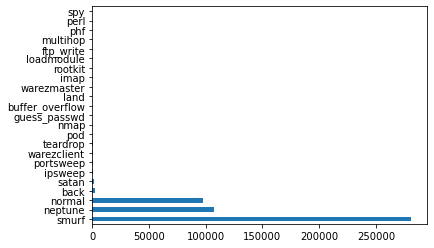

In [8]:
count_labels = df['label'].value_counts()
count_labels.plot(kind = "barh")

Transforma os valores numéricos das colunas em números entre 0 e 1 para realizar as interações mais a frente

In [9]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler transforma os valores em uma escala de 0 a 1 
# para poder interar com mais facilidade colunas de diferentes medidas 
scaler = MinMaxScaler()

# Calcula o mínimo e o máximo para ser usado pra escalar os valores
scaler.fit(df[numeric_cols])

# escala os valores do parâmetro utilizado
df[numeric_cols] = scaler.transform(df[numeric_cols])

Agora é transformado em classes os valores que não são numéricos

In [10]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder funciona muito parecido com o enumerate, dando valores de 0 a n para as diferentes strings 
le = LabelEncoder()

# coloca a coluna label como alvo
target = df['label']

# realiza fit (gera os valores) e e retorna o transform (verifica as classes dos valores) na target
df['label'] = le.fit_transform(target)

# o mesmo do anterior com o protocol_type
df['protocol_type'] = le.fit_transform(df['protocol_type'])

# o mesmo do anterior com o service
df['service'] = le.fit_transform(df['service'])

# o mesmo do anterior com a flag
df['flag'] = le.fit_transform(df['flag'])

Pega uma amostra para teste do dataframe

In [11]:
from sklearn.model_selection import train_test_split
# serpara arrays ou matrizes em subsets randomicos de teste e treinamento
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

print(train_df.shape)
print(test_df.shape)

(345814, 42)
(148206, 42)


Separa em 4 listas, duas para treino e duas para teste, sendo a inputs com todos os campos numéricos e a tager com as classes da label

In [12]:
# apenas copia valores para novas variaveis
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Utiliza o classificador de floresta randomico para verificar quais são as 4 colunas mais importantes para o treinamento

In [13]:
# classificador de floresta randomico
# ver melhor a definição aqui: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
# transformador para selecionar características baseadas em pesos de importância
from sklearn.feature_selection import SelectFromModel

# utiliza o classificador de floresta com estimador = 60 e estado randomico de 42
sel = SelectFromModel(RandomForestClassifier(n_estimators = 60, random_state=42))

# da fit no meta-transformador SelectFromModel
sel.fit(train_inputs, train_targets)

# recebe as colunas que foram selecionadas
selected_feat = train_inputs.columns[(sel.get_support())]

print(selected_feat)
print(len(selected_feat))

Index(['protocol_type', 'service', 'flag', 'dst_bytes', 'count', 'srv_count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate'],
      dtype='object')
12


Utiliza o classificador de floresta randômico para determinar a acurácia ao adivinhar um valor para as informações do dataframe

In [14]:
# classificador de floresta randomico
from sklearn.ensemble import RandomForestClassifier

# utiliza o classificador de floresta com estimador = 1000 e estado randomico de 42
rf = RandomForestClassifier(n_estimators = 2000, random_state = 42)
# realiza o fit passando os inputs que irão receber o treinamento, com as colunas selecionadas no passo anterior e os alvos
rf.fit(train_inputs[selected_feat], train_targets);

# realiza a predição das classes com os inputs de test com as colunas selecionadas pelo feat
preds_rf = rf.predict(test_inputs[selected_feat])

# classificador de acuracia
from sklearn.metrics import accuracy_score

# com base nas classes observadas anteriormente, é verificado quais delas se comportam com o esperado
score_rf = accuracy_score(test_targets, preds_rf)
score_rf

# 0.9936642241204809

0.9987112532556037

Utiliza o classificador de árvore de decisão para verificar a acurácia em comparação com o anterior

In [15]:
# classificador de decisão de floresta
# faz basicamente a mesma coisa que o anterior, a diferença é que agora não utiliza mais os estimadores, porém o resto é igual
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_inputs[selected_feat], train_targets);
preds_dc = dc.predict(test_inputs[selected_feat])
score_dc = accuracy_score(test_targets, preds_dc)

score_dc

0.9984413586494474

Utiliza o classificador k-vizinhos para determinar também a acurácia

In [16]:
# classificador de k vizinhos
# também semelhante aos dois últimos, porém utiliza a parte de k vizinhos para verificar a acuracia
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_inputs[selected_feat], train_targets)
preds_knn = knn.predict(test_inputs[selected_feat])
score_knn = accuracy_score(test_targets, preds_knn)

score_knn

0.9969839277762034

Agora verificando a acurácia com as 4 colunas mais importantes do dataframe

Seleciona o banco de dados novamente para poder fazer a verificação

In [26]:
df4 = df.copy()

Cria as variáveis de treinamento e teste

In [31]:
train_df4, test_df4 = train_test_split(df4, test_size=0.3, random_state=42)

train_inputs4 = train_df4[selected_feat].copy()
train_targets4 = train_df4[target_col].copy()
test_inputs4 = test_df4[selected_feat].copy()
test_targets4 = test_df4[target_col].copy()

Utiliza o classificador de floresta randomico para verificar quais são as 4 colunas mais importantes para o treinamento

In [33]:
# utiliza o classificador de floresta com estimador = 5 e estado randomico de 42
sel4 = SelectFromModel(RandomForestClassifier(n_estimators = 3, random_state=42))

# da fit no meta-transformador SelectFromModel
sel4.fit(train_inputs4, train_targets4)

# recebe as colunas que foram selecionadas
selected_feat4 = train_inputs4.columns[(sel4.get_support())]

print(selected_feat4)
print(len(selected_feat4))

Index(['flag', 'dst_bytes', 'srv_count', 'dst_host_srv_count'], dtype='object')
4


Aplica o classificador de floresta para determinar a acurácia

In [35]:
rf4 = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf4.fit(train_inputs4[selected_feat4], train_targets4)
preds_rf4 = rf4.predict(test_inputs4[selected_feat4])

score_rf4 = accuracy_score(test_targets, preds_rf4)
print(f'Acurácia com todas as informações {score_rf}')
print(f'Acurácia com 4 informações {score_rf4}')

Acurácia com todas as informações 0.9987112532556037
Acurácia com 4 informações 0.9924496983927776


Aplica o classificador de árvore de decisão para determinar a acurácia

In [36]:
dc4 = DecisionTreeClassifier()
dc4.fit(train_inputs4[selected_feat4], train_targets4);
preds_dc4 = dc4.predict(test_inputs4[selected_feat4])
score_dc4 = accuracy_score(test_targets4, preds_dc4)

print(f'Acurácia com todas as informações {score_dc}')
print(f'Acurácia com 4 informações {score_dc4}')


Acurácia com todas as informações 0.9984413586494474
Acurácia com 4 informações 0.992200045882083


Aplica o classificador k-vizinhos para determinar a acurácia

In [37]:
knn4 = KNeighborsClassifier(n_neighbors=7)
knn4.fit(train_inputs4[selected_feat4], train_targets4)
preds_knn4 = knn4.predict(test_inputs4[selected_feat4])
score_knn4 = accuracy_score(test_targets4, preds_knn4)

print(f'Acurácia com todas as informações {score_knn}')
print(f'Acurácia com 4 informações {score_knn4}')


Acurácia com todas as informações 0.9969839277762034
Acurácia com 4 informações 0.9892716894052872
